In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv('crime.csv')

In [3]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516314 entries, 0 to 516313
Data columns (total 19 columns):
INCIDENT_ID               516314 non-null int64
OFFENSE_ID                516314 non-null int64
OFFENSE_CODE              516314 non-null int64
OFFENSE_CODE_EXTENSION    516314 non-null int64
OFFENSE_TYPE_ID           516314 non-null object
OFFENSE_CATEGORY_ID       516314 non-null object
FIRST_OCCURRENCE_DATE     516314 non-null object
LAST_OCCURRENCE_DATE      163490 non-null object
REPORTED_DATE             516314 non-null object
INCIDENT_ADDRESS          465855 non-null object
GEO_X                     512049 non-null float64
GEO_Y                     512049 non-null float64
GEO_LON                   512049 non-null float64
GEO_LAT                   512049 non-null float64
DISTRICT_ID               516314 non-null int64
PRECINCT_ID               516314 non-null int64
NEIGHBORHOOD_ID           516314 non-null object
IS_CRIME                  516314 non-null int64
IS_TRAFFIC

In [5]:
data.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      352824
REPORTED_DATE                  0
INCIDENT_ADDRESS           50459
GEO_X                       4265
GEO_Y                       4265
GEO_LON                     4265
GEO_LAT                     4265
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [6]:
data.drop(['LAST_OCCURRENCE_DATE','INCIDENT_ADDRESS','GEO_X','GEO_Y'],axis=1,inplace=True)

In [7]:
data_codes = pd.read_csv('offense_codes.csv')

In [8]:
data_codes.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [9]:
data_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
OFFENSE_CODE              299 non-null int64
OFFENSE_CODE_EXTENSION    299 non-null int64
OFFENSE_TYPE_ID           299 non-null object
OFFENSE_TYPE_NAME         299 non-null object
OFFENSE_CATEGORY_ID       299 non-null object
OFFENSE_CATEGORY_NAME     299 non-null object
IS_CRIME                  299 non-null int64
IS_TRAFFIC                299 non-null int64
dtypes: int64(4), object(4)
memory usage: 18.8+ KB


In [10]:
data_codes.isnull().sum()

OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_TYPE_NAME         0
OFFENSE_CATEGORY_ID       0
OFFENSE_CATEGORY_NAME     0
IS_CRIME                  0
IS_TRAFFIC                0
dtype: int64

In [11]:
data_temp = data.merge(right=data_codes,how='left', left_on =['OFFENSE_CODE','OFFENSE_CODE_EXTENSION'],right_on=['OFFENSE_CODE','OFFENSE_CODE_EXTENSION'])
data_temp.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,FIRST_OCCURRENCE_DATE,REPORTED_DATE,GEO_LON,GEO_LAT,...,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_TYPE_ID_y,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID_y,OFFENSE_CATEGORY_NAME,IS_CRIME_y,IS_TRAFFIC_y
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,-104.809881,39.773188,...,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,all-other-crimes,All Other Crimes,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,-104.781434,39.785649,...,522,gateway-green-valley-ranch,1,0,theft-other,Theft - other,larceny,Larceny,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,-104.957381,39.663490,...,314,wellshire,1,0,theft-items-from-vehicle,Theft of items from a vehicle,theft-from-motor-vehicle,Theft from Motor Vehicle,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,-104.941440,39.702698,...,312,belcaro,1,0,theft-other,Theft - other,larceny,Larceny,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,-104.955370,39.717107,...,311,cherry-creek,1,0,theft-shoplift,Shoplifting,larceny,Larceny,1,0


In [12]:
(data_temp['OFFENSE_TYPE_ID_x']==data_temp['OFFENSE_TYPE_ID_y']).all()

True

In [13]:
(data_temp['OFFENSE_CATEGORY_ID_x']==data_temp['OFFENSE_CATEGORY_ID_y']).all()

True

In [14]:
(data_temp['IS_CRIME_x']==data_temp['IS_CRIME_y']).all()

True

In [15]:
(data_temp['IS_TRAFFIC_x']==data_temp['IS_TRAFFIC_y']).all()

True

In [16]:
data = data_temp.loc[:,~data_temp.columns.str.endswith('_y')]

In [17]:
data.columns = data.columns.str.replace('_x', '')

In [18]:
data.drop(['OFFENSE_CODE','OFFENSE_CODE_EXTENSION'],axis=1,inplace=True)

C:\Users\Yuasto\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,20186000994,20186000994239900,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft - other,Larceny
2,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny


In [20]:
data.isnull().sum()

INCIDENT_ID                 0
OFFENSE_ID                  0
OFFENSE_TYPE_ID             0
OFFENSE_CATEGORY_ID         0
FIRST_OCCURRENCE_DATE       0
REPORTED_DATE               0
GEO_LON                  4265
GEO_LAT                  4265
DISTRICT_ID                 0
PRECINCT_ID                 0
NEIGHBORHOOD_ID             0
IS_CRIME                    0
IS_TRAFFIC                  0
OFFENSE_TYPE_NAME           0
OFFENSE_CATEGORY_NAME       0
dtype: int64

In [21]:
data['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(data['FIRST_OCCURRENCE_DATE'], infer_datetime_format=True)
data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'], infer_datetime_format=True)

C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,2016-06-15 23:31:00,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,20186000994,20186000994239900,theft-other,larceny,2017-10-11 12:30:00,2018-01-29 17:53:00,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft - other,Larceny
2,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-26 21:02:00,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,theft-other,larceny,2018-01-30 19:20:00,2018-01-30 22:29:00,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,theft-shoplift,larceny,2017-06-22 20:53:00,2017-06-23 16:09:00,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny


In [23]:
min(data['FIRST_OCCURRENCE_DATE'])

Timestamp('2014-01-02 00:00:00')

In [24]:
max(data['FIRST_OCCURRENCE_DATE'])

Timestamp('2019-09-26 02:35:00')

In [25]:
data.groupby('OFFENSE_CATEGORY_NAME').agg({'INCIDENT_ID':'count'}).sort_values(by='INCIDENT_ID',ascending=False)

,INCIDENT_ID
OFFENSE_CATEGORY_NAME,
Traffic Accident,134230
All Other Crimes,93359
Public Disorder,53728
Larceny,52399
Theft from Motor Vehicle,39122
Drug & Alcohol,33895
Auto Theft,27481
Burglary,25433
Other Crimes Against Persons,25419


In [26]:
data[data['OFFENSE_CATEGORY_NAME']=='Traffic Accident'].groupby('OFFENSE_TYPE_NAME').agg({'INCIDENT_ID':'count'}).sort_values(by='INCIDENT_ID',ascending=False)

,INCIDENT_ID
OFFENSE_TYPE_NAME,
Traffic accident,93697
Traffic accident - hit and run,36525
Traffic accident - DUI-DUID,4008


In [27]:
data.groupby(['OFFENSE_CATEGORY_NAME','OFFENSE_TYPE_NAME']).agg({'INCIDENT_ID':'count'}).groupby(['OFFENSE_CATEGORY_NAME']).head().sort_values(by=['OFFENSE_CATEGORY_NAME','INCIDENT_ID'],ascending = [True,False])

INCIDENT_ID
OFFENSE_CATEGORY_NAME        OFFENSE_TYPE_NAME                                              
Aggravated Assault           Assault causing serious bodily injury                      5733
                             Threatening to imminently injure with a weapon             3376
                             Assault causing serious bodily injury - domesti...         2308
                             Weapon fired into an occupied building                      691
                             Weapon fired into an occupied vehicle                       178
All Other Crimes             Assault causing serious bodily injury of a poli...          318
                             Accessory / conspiracy to crime                             147
                             Altering the serial number                                   26
                             Assault causing serious bodily injury of a poli...           10
                             Aiding the escape of a prisoner                               5
Arson                        Arson                                                       199
                             Arson of a vehicle                                          194
                             Arson of a residence                                        164
                             Arson of a business                                          73
                             Arson to a public building                                   18
Auto Theft                   Motor vehicle theft                                       26895
                             Theft of a trailer                                          539
                             Theft of construction equipment                              47
Burglary                     Burglary of a business with forced entry                   5152
                             Burglary and auto theft at a residence without ...          442
                             Burglary and auto theft at a residence with for...          176
                             Burglary and auto theft at a business with forc...          146
                             Burglary and auto theft at a business without f...           47
Drug & Alcohol               Illegal possession of liquor                               8252
                             Illegal sale of liquor                                      377
                             Cultivation of marijuana                                    221
                             Fraud to obtain drugs                                       166
                             Liquor law violation                                          5
Larceny                      Theft - other                                             20833
                             Shoplifting                                               14962
...                                                                                      ...
Other Crimes Against Persons Assault causing minor bodily injury                       14236
                             Assault causing minor bodily injury - domestic ...         9421
                             Indecent exposure                                           850
                             Assault causing minor bodily injury to a police...          763
                             Manufacture of obscene material                               6
Public Disorder              Criminal mischief to a motor vehicle                      15647
                             Criminal mischief - other                                 13878
                             Criminal mischief - graffiti                               3166
                             Curfew                                                     1568
                             Aiding the act of prostitution                                5
Robbery                      Robbery of a business using a weapon                 

In [28]:
data['FIRST_OCCURRENCE_HOUR'] = data['FIRST_OCCURRENCE_DATE'].dt.hour

C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


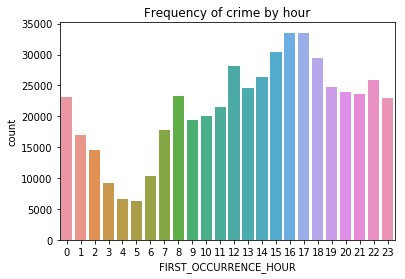

In [29]:
sns.countplot(data=data,x='FIRST_OCCURRENCE_HOUR')
plt.title('Frequency of crime by hour')
plt.show()

In [30]:
data[data['FIRST_OCCURRENCE_HOUR'].isin([15,16,17,18])].groupby(['FIRST_OCCURRENCE_HOUR','OFFENSE_CATEGORY_NAME']).agg({'INCIDENT_ID':'count'}).groupby(['FIRST_OCCURRENCE_HOUR']).head().sort_values(by=['FIRST_OCCURRENCE_HOUR','INCIDENT_ID'],ascending = [True,False])

INCIDENT_ID
FIRST_OCCURRENCE_HOUR OFFENSE_CATEGORY_NAME             
15                    All Other Crimes              5147
                      Burglary                      1073
                      Auto Theft                     967
                      Aggravated Assault             566
                      Arson                           14
16                    All Other Crimes              6037
                      Burglary                      1218
                      Auto Theft                    1145
                      Aggravated Assault             580
                      Arson                           28
17                    All Other Crimes              5033
                      Burglary                      1747
                      Auto Theft                    1685
                      Aggravated Assault             579
                      Arson                           28
18                    All Other Crimes              4888
                      Auto Theft                    1724
                      Burglary                      1605
                      Aggravated Assault             634
                      Arson                           38

In [31]:
murder_ttl_count = data[data['OFFENSE_CATEGORY_NAME']=='Murder']['INCIDENT_ID'].count()
ttl_count = data['INCIDENT_ID'].count()
murder_midnight_count = data[(data['OFFENSE_CATEGORY_NAME']=='Murder')&((data['FIRST_OCCURRENCE_HOUR']>=22)| (data['FIRST_OCCURRENCE_HOUR']<=4))]['INCIDENT_ID'].count()
midnight_count= data[(data['FIRST_OCCURRENCE_HOUR']>=22)| (data['FIRST_OCCURRENCE_HOUR']<=4)]['INCIDENT_ID'].count()

lift = (murder_midnight_count / midnight_count) / (murder_ttl_count/ttl_count)
print("Average probability of having murder during the whole day : {:1.6f}".format((murder_ttl_count/ttl_count)))
print("Probability of having murder during the midnight : {:1.6f}".format((murder_midnight_count / midnight_count)))
print("The lift is : {:1.6f}".format(lift))

Average probability of having murder during the whole day : 0.000604
Probability of having murder during the midnight : 0.001190
The lift is : 1.969831


In [32]:
data_murder = data[data['OFFENSE_CATEGORY_NAME']=='Murder']
data_murder.isnull().sum()

INCIDENT_ID              0
OFFENSE_ID               0
OFFENSE_TYPE_ID          0
OFFENSE_CATEGORY_ID      0
FIRST_OCCURRENCE_DATE    0
REPORTED_DATE            0
GEO_LON                  0
GEO_LAT                  0
DISTRICT_ID              0
PRECINCT_ID              0
NEIGHBORHOOD_ID          0
IS_CRIME                 0
IS_TRAFFIC               0
OFFENSE_TYPE_NAME        0
OFFENSE_CATEGORY_NAME    0
FIRST_OCCURRENCE_HOUR    0
dtype: int64

In [33]:
data_murder[['GEO_LON','GEO_LAT']].describe()

,GEO_LON,GEO_LAT
count,312.000000,312.000000
mean,-104.281959,39.482005
std,8.389894,3.176599
min,-105.060293,0.000001
25%,-105.010195,39.710585
50%,-104.972982,39.741874
75%,-104.906958,39.765542
max,-0.000002,39.802173


In [34]:
denver_map = folium.Map(location=[39.7, -104.9],zoom_start =11)
data_loc= data_murder[['GEO_LAT','GEO_LON']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(denver_map)
denver_map